In [1]:
# As in preprocessing we get that annual rainfall is highly collinear with June July August and September rainfall data.
# So we prepare a model in which we give annual Rainfall and it will predict how much we get rainfall in Monsoon Months.
# As it is Regression problem so we use linear Regression firsts then we modify it by hypertuning and try to get a best model.

# import Everything

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset = pd.read_csv(r'EastUttarPradeshClimate.csv')
dataset.head()

,Unnamed: 0,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1012,EAST UTTAR PRADESH,1901.0,62.6,31.3,8.2,1.1,13.6,21.8,226.5,285.6,215.4,4.9,0.1,2.1,873.2
1,1013,EAST UTTAR PRADESH,1902.0,6.1,2.3,2.4,2.0,21.4,32.5,411.5,155.4,257.2,13.2,1.2,0.0,905.2
2,1014,EAST UTTAR PRADESH,1903.0,8.2,0.4,1.3,0.7,15.3,71.6,115.3,420.2,258.7,324.7,0.0,0.0,1216.4
3,1015,EAST UTTAR PRADESH,1904.0,7.3,1.5,8.3,0.4,28.7,148.0,359.4,328.8,95.0,50.6,17.0,26.3,1071.2
4,1016,EAST UTTAR PRADESH,1905.0,16.8,23.6,20.0,5.4,15.4,17.3,302.4,316.2,169.5,3.3,0.0,1.6,891.6


# Feature Selection

In [4]:
dataset = dataset[['ANNUAL','JUN','JUL','AUG','SEP']]

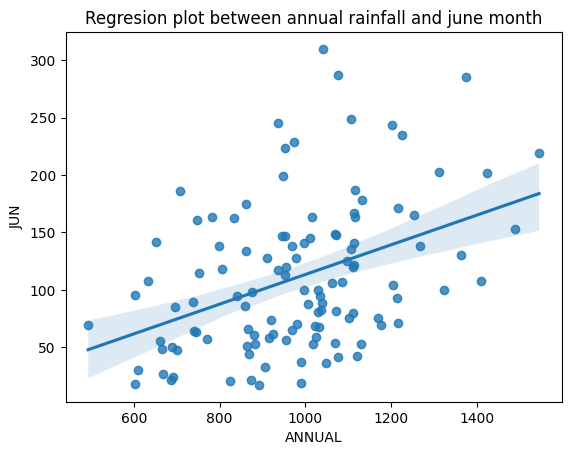

In [5]:
sns.regplot(x = 'ANNUAL' , y = 'JUN' , data = dataset)
plt.title('Regresion plot between annual rainfall and june month')
#plt.savefig("AnnualVsJune.png")
plt.show()

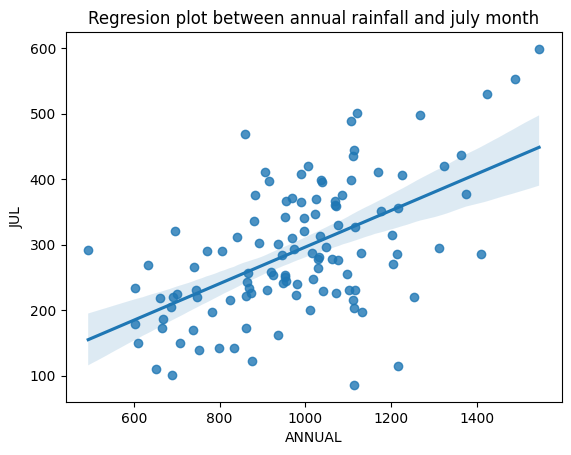

In [6]:
sns.regplot(x = 'ANNUAL' , y = 'JUL' , data = dataset)
plt.title('Regresion plot between annual rainfall and july month')
#plt.savefig("AnnualVsJuly.png")
plt.show()

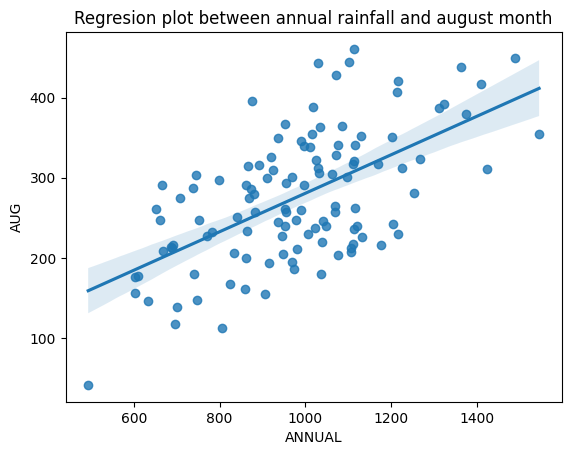

In [7]:
sns.regplot(x = 'ANNUAL' , y = 'AUG' , data = dataset)
plt.title('Regresion plot between annual rainfall and august month')
#plt.savefig("AnnualVsAugust.png")
plt.show()

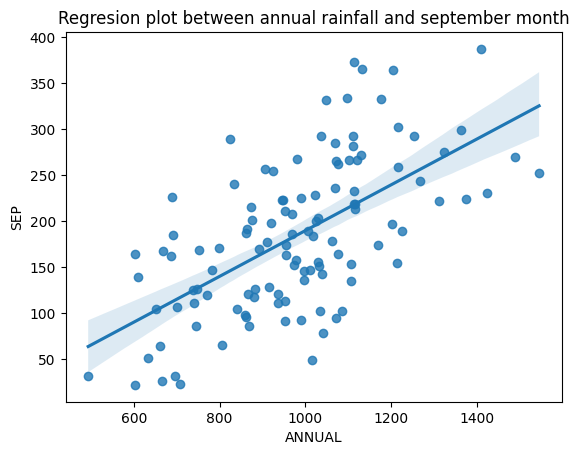

In [8]:
sns.regplot(x = 'ANNUAL' , y = 'SEP' , data = dataset)
plt.title('Regresion plot between annual rainfall and september month')
#plt.savefig("AnnualVsSeptember.png")
plt.show()

In [9]:
X = dataset[['ANNUAL']]
y = dataset[['JUN','JUL','AUG','SEP']]

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size= 0.3  , random_state= 45)

# Model Selection

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.neighbors import KNeighborsRegressor

In [12]:
def score(models):
    score = {'model' : [],
        'mae' : [] ,
        'mse' : [],
        'r2_score' : []}
    for Model in models:
        Model.fit(X_train , y_train)
        pred = Model.predict(X_test)
        MAE = mean_absolute_error(y_test , pred)
        MSE = mean_squared_error(y_test , pred)
        r2 = r2_score(y_test , pred)
        score['model'].append(Model)
        score['mae'].append(MAE)
        score['mse'].append(MSE)
        score['r2_score'].append(r2)
    return score

In [13]:
models= [LinearRegression() ,  Lasso() , Ridge() ,  MultiTaskElasticNet() , MultiTaskElasticNetCV(cv=5) ,  KNeighborsRegressor()]
score = score(models)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
models= [ Lasso() , Ridge() ,  MultiTaskElasticNet() , MultiTaskElasticNetCV() ,  KNeighborsRegressor()]

In [15]:
params = {
    0 : dict(alpha = [1,2,3,4,5,10,20] ,
    selection = ['cyclic', 'random'] ) ,

    1 : dict(alpha = [1,2,3,4,5,10,20] ,
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'] ) ,

    2 : dict(l1_ratio = [.5, .7, .9, .95, .99, 1] ,
    selection = ['cyclic', 'random']) ,

    3 : dict(l1_ratio = [.5, .7, .9, .95, .99, 1] ,
    cv = [2,10,5] ,
    selection = ['cyclic', 'random']) ,
    
    4 : dict(n_neighbors = [5,10,20, 50] ,
    weights = ['uniform', 'distance'] ,
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']  ) }

In [16]:
from sklearn.model_selection import GridSearchCV
def grid_score(models , params):
    grid_score_ = {
        'model' : [] ,
        'Best Parameter' : [] ,
        'Best Score' : [],
        'mse' : [],
        'mae' : [],
        'r2_score' : []}
    for i in range(5):
        grid_score_['model'].append(models[i])
        grid = GridSearchCV( estimator= models[i] , param_grid= params[i] , scoring = 'r2')
        grid.fit(X_train , y_train)
        grid_score_['Best Parameter'].append(grid.best_params_)
        grid_score_['Best Score'].append(grid.best_score_)
        pred = grid.predict(X_test)
        grid_score_['mse'].append(mean_squared_error(y_test , pred))
        grid_score_['mae'].append(mean_absolute_error(y_test , pred))
        grid_score_['r2_score'].append(r2_score(y_test , pred))
    return grid_score_

In [17]:
grid_score_ = grid_score(models , params)

C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayush\AppDa

# Result

In [18]:
model_score_set = pd.DataFrame(score)

In [19]:
grid_score_set = pd.DataFrame(grid_score_)

In [20]:
result = pd.concat([model_score_set , grid_score_set ] , ignore_index=True)

In [21]:
result

,model,mae,mse,r2_score,Best Parameter,Best Score
0,LinearRegression(),59.988511,5566.084678,0.158738,NaN,NaN
1,Lasso(),59.988578,5566.035275,0.158749,NaN,NaN
2,Ridge(),59.988512,5566.084512,0.158738,NaN,NaN
3,MultiTaskElasticNet(),59.988546,5566.064118,0.158741,NaN,NaN
4,MultiTaskElasticNetCV(cv=5),59.989952,5565.243554,0.158874,NaN,NaN
5,KNeighborsRegressor(),64.679143,6127.072063,0.070440,NaN,NaN
6,Lasso(),59.989851,5565.104129,0.158968,"{'alpha': 20, 'selection': 'cyclic'}",0.199660
7,Ridge(),59.988345,5566.091436,0.158736,"{'alpha': 5, 'solver': 'sag'}",0.199754
8,MultiTaskElasticNet(),59.988559,5566.056856,0.158742,"{'l1_ratio': 1, 'selection': 'cyclic'}",0.199591
9,MultiTaskElasticNetCV(),59.989952,5565.243554,0.158874,"{'cv': 5, 'l1_ratio': 0.5, 'selection': 'cyclic'}",0.200771


In [22]:
# As we can see the algorithm we applied didn't give a beneficial result but if we have to choose better algo then we can 
# take KNN algo because its Mean Squared Error is very less and its R2 Score is high in comparison to others

In [23]:
print(result.iloc[10]['Best Parameter'])

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}


# Model Generation

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
knn = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 20, weights= 'uniform')
knn.fit(X_train , y_train)
pred = knn.predict(X_test)
print('r2_score : ',r2_score(y_test , pred))
print('mean_squared_error : ',mean_squared_error(y_test , pred))
print('mean_absolute_error : ',mean_absolute_error(y_test , pred))

r2_score :  0.16513200743353582
mean_squared_error :  5440.773692857142
mean_absolute_error :  61.100571428571435


# Pickling

In [25]:
#import pickle as pkl
#file = open('UPEastModel.pkl' , 'wb')
#pkl.dump(knn , file)